# 이미지로딩

In [1]:
import cv2

# 이미지 가져오기
# 파일경로, 이미지형식
img=cv2.imread('data/test1.jpg',cv2.IMREAD_COLOR)

#이미지 윈도우에서 띄우기
cv2.imshow('title',img)

#윈도우에서 띄운 창닫기
cv2.waitKey(1000)    #키보드 입력을 기다리는 시간 (0 : 계속 기다린다는 뜻이다)
cv2.destroyAllWindows()  # 생성한 모든 윈도우 창을 닫는다

# matplolib을 이용한 컬러 이미지 로딩

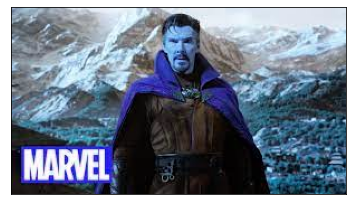

In [2]:
import cv2    ##### 앞을 실행도중에 커널이 죽어도 이곳부터는 실행될 수 있게 다시 부르는 것이다 
import matplotlib.pyplot as plt
# BGR > RGB로 바꿔야함     #####파이썬에서는 rgb대신 bgr이라고 인식한다고 한다.  
img=cv2.imread('data/test1.jpg',cv2.IMREAD_COLOR)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

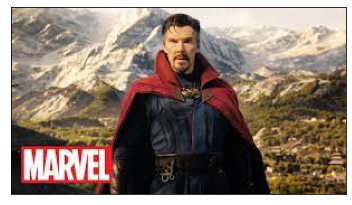

In [3]:
import cv2    ##### 앞을 실행도중에 커널이 죽어도 이곳부터는 실행될 수 있게 다시 부르는 것이다 
import matplotlib.pyplot as plt
# BGR > RGB로 바꿔야함     #####파이썬에서는 rgb대신 bgr이라고 인식한다고 한다.  
img=cv2.imread('data/test1.jpg',cv2.IMREAD_COLOR)

img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
# 세로, 가로, 색상체계값
# 시작점은 좌상단
# 픽셀값은 0~255로 구성
img.shape   ##### 이미지의 원점은  좌상단이다.     그래프 식의 원점과는 다르다

(168, 300, 3)

# 흑백 이미지 로딩

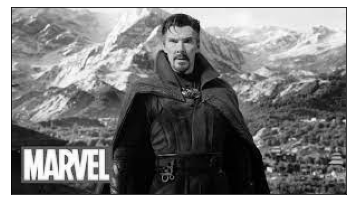

In [5]:
#컬러 이미지를 흑백이미지로 변환
import cv2    
import matplotlib.pyplot as plt
# BGR >Gray로 변경      
img2=cv2.imread('data/test1.jpg',cv2.IMREAD_COLOR)

img2=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.imshow(img2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

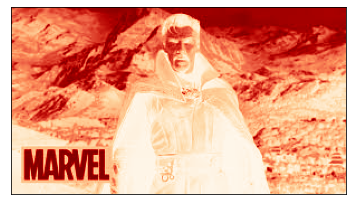

In [6]:
import cv2    
import matplotlib.pyplot as plt
# BGR >Gray로 변경      
img2=cv2.imread('data/test1.jpg',cv2.IMREAD_GRAYSCALE)


plt.imshow(img2, cmap='OrRd')
plt.xticks([])
plt.yticks([])
plt.show()

# 이민 이미지로 표현하기
- 흑백이미지 필요

In [7]:
img2.shape   ##### 색상을 하나만 사용해서 흑백체계를 만들었기 때믄에 마지막 내용이 없다

(168, 300)

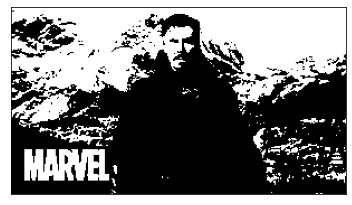

In [8]:
# 이진 이미지 만들기
# 이미지, 문턱값, 적용값,문턱값 적용방법    #####바이너리_INV를 실행하면 흑백이 반전된다   
ret, thr = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)

plt.imshow(thr, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
# 문턱값(ret)  흑과 백을 나누는 기준  기준이 되는 값
# 이진이미지(thr) 픽셀값
# 적용값=문턱값을 기준으로 문턱값보다 클때 적용할 값   
##ret
thr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# 동영상(카메라) 실행하기

In [10]:
##### 가지고 있는 동영상을 실행할수도 있고 카메라를 이용해서 실시간으로 영상을 출력할 수 있다

import cv2
# 비디오 불러오기
cap=cv2.VideoCapture('./data/test2.mp4')   ##### 동영상을 이미지상태로 계속해서 가져오는 느낌의 처리다

cnt=0
while True:
    #불러온 비디오를 사진으로 읽기
    # ret : 사진을 불러오면 True, 불러오지 못하면 False
    # frame : 사진값
    ret, frame=cap.read()
    
    #ret이 False일때 사진 출력 중단하기
    if not ret:
        print('동영상 중단')
        cv2.destroyAllWindows()
        cap.release()
        break
        
    cv2.imshow('video',frame)
    k=cv2.waitKey(30)
    
    #원하는 시점에 동영상 중단하기  ##### 위쪽 중단은 오류가 발생하거나 모두 불러온 이후의 종료다
    #숫자 1(!)을 누르면 중단.  
    
    if k==49:      ##### 1은 아스키코드 49 기때문에
        print('동영상 멈추기')
        cap.release()
        cv2.destroyAllWindows()
        break
    
    # 캡쳐하기 
    # 숫자2를 입력했을 때 
    if k==50:      ##### 2는 아스키코드 50
        cnt+=1
        print('./data/cap/cap{}.png'.format(cnt) )
        cv2.imwrite('./data/cap/cap{}.png'.format(cnt),frame, params=[cv2.IMWRITE_PNG_COMPRESSION, 0] ) 
        #저장할 파일이름,저장할 데이터,압축형식  (0~9까지,0은 압축없음 )
            

동영상 멈추기


# 동영상 녹화하기

In [17]:
import cv2
# 비디오 불러오기
cap=cv2.VideoCapture('./data/test2.mp4')   ##### 동영상을 이미지상태로 계속해서 가져오는 느낌의 처리다

fps=30.0  # 1초에 띄울 사진 수
width=int( cap.get(3) )  #동영상 가로크기    3을 입력하면 가로크기를 그냥 알 수 있다
height=int( cap.get(4) ) #동영상 세로크기

#확장자 avi>DIVX,  mp4>MPEG
fcc=cv2.VideoWriter_fourcc(*'DIVX')
#녹화할 동영상 파일
out=cv2.VideoWriter('./data/sample.avi',fcc,fps, (width,height) )

#원하는 시점에 녹화하기 위해
record=False

while True:
    #불러온 비디오를 사진으로 읽기
    # ret : 사진을 불러오면 True, 불러오지 못하면 False
    # frame : 사진값
    ret, frame=cap.read()
    
    #ret이 False일때 사진 출력 중단하기
    if not ret:
        print('동영상 중단')
        cv2.destroyAllWindows()
        cap.release()
        break
        
    cv2.imshow('video',frame)
    k=cv2.waitKey(30)
    
    #녹화기능
    if record:
        out.write(frame)
    
    #원하는 시점에 동영상 중단하기  ##### 위쪽 중단은 오류가 발생하거나 모두 불러온 이후의 종료다
    #숫자 1(!)을 누르면 중단.  
    
    if k==49:      ##### 1은 아스키코드 49 기때문에
        print('동영상 멈추기')
        #out.release()   ##### 녹화를 종료하는 코드 
        cap.release()
        cv2.destroyAllWindows()
        break
        
        
    #원하는 시점부터 녹화하기
    #숫자2(@) 를 누르면 시작
    if k==50:      ##### 2는 아스키코드 50
        print('녹화를 시작합니다')
        record=True
        
    #녹화중지하기
    #숫자3(#)을 누르면 녹화중지  ####$ 현재상태 코드에서는 녹화가 없이 중단되면 out객체가 꺼지지않는 단점이 있다
    if k==51:
        print('녹화를 종료합니다')
        record=False
        out.release()        
        
    

녹화를 시작합니다
녹화 멈추기
동영상 멈추기
